In [1]:
#coding:utf-8
import MyClassify.ClassifyModel as mcmodel
import MyClassify.DataHandler as dh
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import collections
class SaverData(collections.namedtuple('SaverData', ['ckpt','name'])):
    pass
savedatas = [
    SaverData("./ckpt/class_0.00000.ckpt-15000","No Regularation"),
    SaverData("./ckpt/class_-0.01000.ckpt-15000","0.01 L1 Regularation"),
    SaverData("./ckpt/class_-0.00100.ckpt-15000","0.001 L1 Regularation"),
    SaverData("./ckpt/class_-0.00010.ckpt-15000","0.0001 L1 Regularation"),
    SaverData("./ckpt/class_0.01000.ckpt-15000","0.01 L2 Regularation"),
    SaverData("./ckpt/class_0.00100.ckpt-15000","0.001 L2 Regularation"),
    SaverData("./ckpt/class_0.00010.ckpt-15000","0.0001 L2 Regularation"),
]

INFO:tensorflow:Restoring parameters from ./ckpt/class_0.00000.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_-0.01000.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_-0.00100.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_-0.00010.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_0.01000.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_0.00100.ckpt-15000
INFO:tensorflow:Restoring parameters from ./ckpt/class_0.00010.ckpt-15000


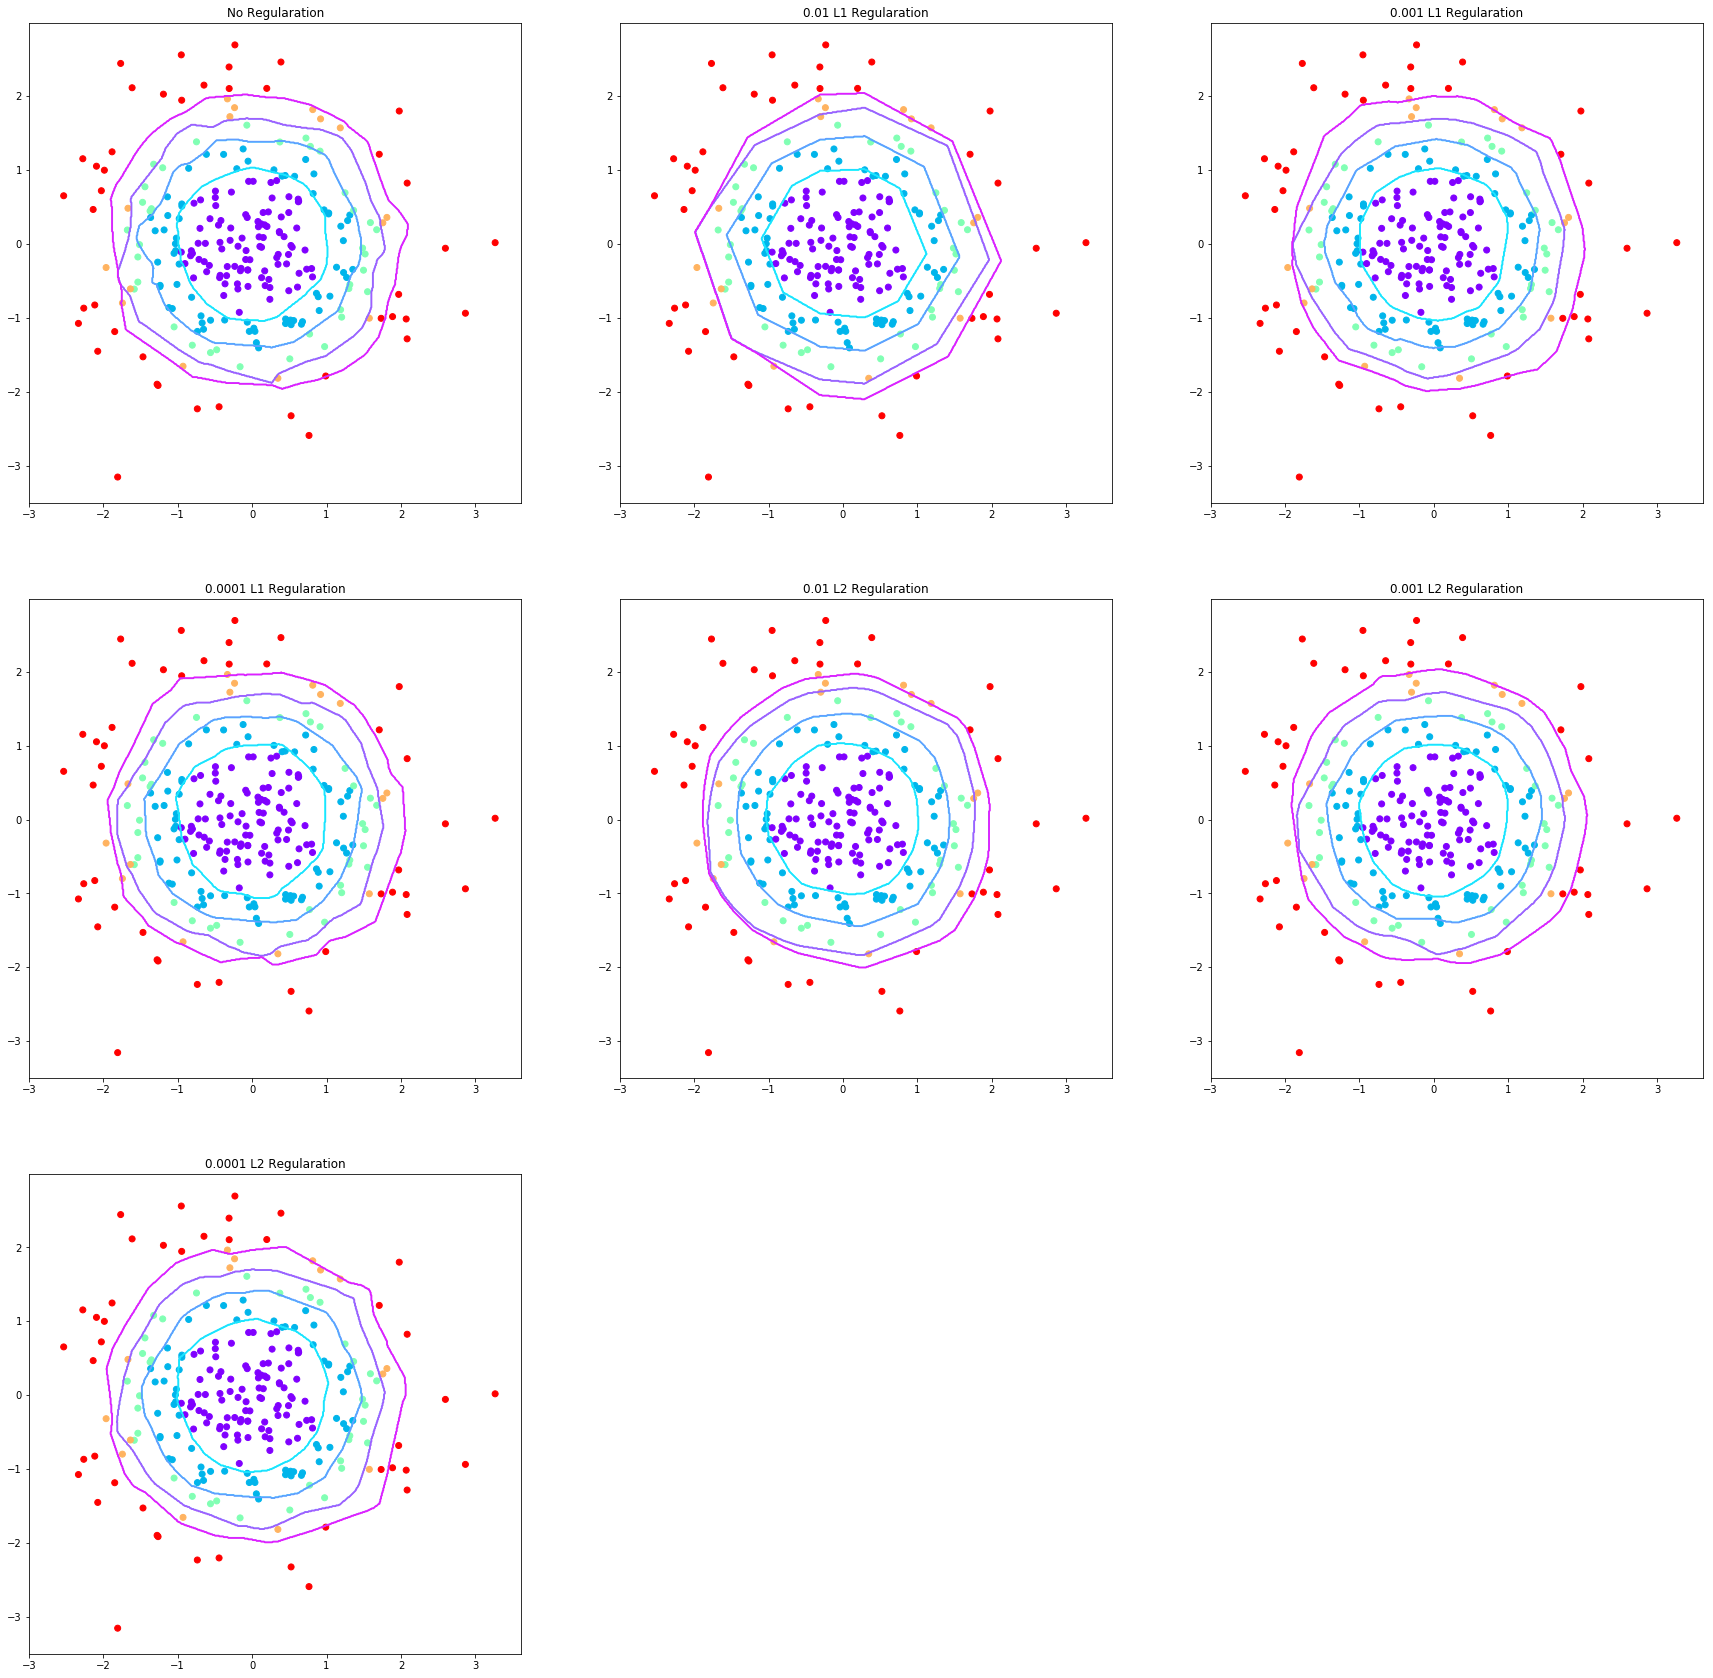

In [9]:
dataGen =  dh.DataHandler(111,256,5,64)
x,y = zip(*dataGen.datas)

plt.figure(figsize=(30,30))
for i,savedata in enumerate(savedatas):
    ckpt = savedata.ckpt
    meta = ckpt + '.meta'
    graph = tf.Graph()
    with graph.as_default():
        saver = tf.train.import_meta_graph(meta)
        with tf.Session(graph=graph) as sess:
            sess.run(tf.global_variables_initializer())
            saver.restore(sess,ckpt)
            xx,yy = np.mgrid[-3:3:0.01,-3:3:0.01]
            combine = np.c_[xx.ravel(),yy.ravel()]
            logits_op = sess.graph.get_tensor_by_name("logits:0")
            pre_labels = sess.run(logits_op,feed_dict={'inputs:0':combine,"dropout:0":1})
            pre_labels = np.argmax(pre_labels,axis=1)
            pre_labels = np.reshape(pre_labels,xx.shape)
            plt.subplot(3,3,1 + i)
            plt.contour(xx,yy,pre_labels,cmap='cool')
            plt.scatter(x,y,c=dataGen.labels,cmap='rainbow')
            plt.title(savedata.name)
plt.show()